In [ ]:
import pandas as pd
import pandas_ta as ta
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import talib as tl 
from matplotlib import style

plt.style.use('dark_background')
#plt.style.use('default')

start_date = "2015-10-27"
end_date = "2022-08-02"
stock1 = "AAPL"
df = yf.download([stock1], start = start_date, end = end_date)
#print('data fields downloaded:', set(df.columns.get_level_values(0)))

Mean_Reversion = pd.DataFrame()

[*********************100%***********************]  1 of 1 completed


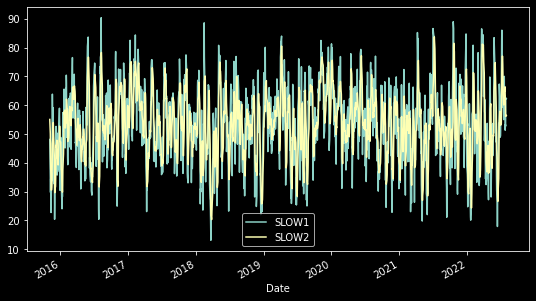

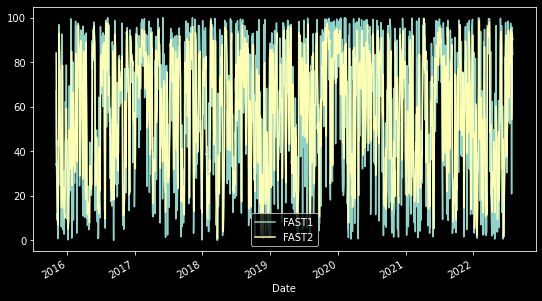

In [ ]:
#---------------- Mean Reversion --------------------
#Stochastic Slow (Momentum Indicators)
Mean_Reversion['SLOW1'],Mean_Reversion['SLOW2']= tl.STOCH(df['High'],df['Low'],df['Close'],1,5,0,5,0)
Mean_Reversion[['SLOW1','SLOW2']].plot(figsize=(9,5))
plt.show()

#Stochastic Fast (Momentum Indicators)
Mean_Reversion['FAST1'],Mean_Reversion['FAST2']= tl.STOCHF(df['High'],df['Low'],df['Close'],5,3)
Mean_Reversion[['FAST1','FAST2']].plot(figsize=(9,5))
plt.show()
#--------------------------------------------


In [ ]:
Mean_Reversion.shape

(1702, 4)

In [ ]:
Mean_Reversion = Mean_Reversion.replace('?', np.nan)
Mean_Reversion.isnull().sum()

SLOW1    8
SLOW2    8
FAST1    6
FAST2    6
dtype: int64

In [ ]:
def fill_missing(values):
    one_day = 60*24
    for row in range(Mean_Reversion.shape[0]):
        for col in range(Mean_Reversion.shape[1]):
            if np.isnan(values[row][col]):
                values[row,col] = values[row-one_day,col]
df = df.astype('float32')
fill_missing(Mean_Reversion.values)
Mean_Reversion.isnull().sum()

SLOW1    0
SLOW2    0
FAST1    0
FAST2    0
dtype: int64

In [ ]:
from sklearn.decomposition import PCA

# Initialize PCA model with number of components desired
pca = PCA(n_components=1)
# Fit PCA model to the data and transform it
X_transformed = pca.fit_transform(Mean_Reversion)

# The transformed data now has only 1 features
print(X_transformed.shape)

(1702, 1)


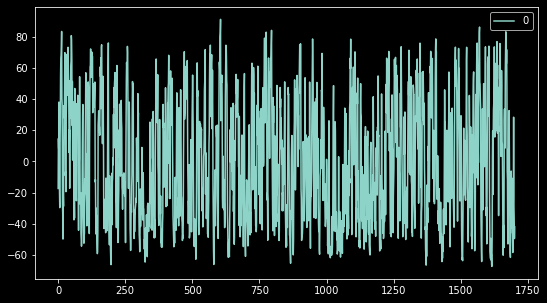

In [ ]:
x = pd.DataFrame(X_transformed)
x.plot(figsize=(9,5))
plt.show()

In [1]:
"""
import pandas_ta as ta

df.ta.strategy(verbose=True) # Default is ta.AllStrategy
# or more explicitly
# df.ta.strategy(ta.AllStrategy, verbose=True)
print(df)
"""

'\nimport pandas_ta as ta\n\ndf.ta.strategy(verbose=True) # Default is ta.AllStrategy\n# or more explicitly\n# df.ta.strategy(ta.AllStrategy, verbose=True)\nprint(df)\n'